# Extracción de características de New York

In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import funpymodeling.exploratory as fp

In [349]:
df = pd.read_csv('listings - New York_clean.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2595,2845,city scrape,Skylit Midtown Castle Sanctuary,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,...,0.0,0.0,4.68,4.73,4.63,4.77,4.80,4.81,4.40,0.27
1,6848,15991,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,No neighborhood_overview,Allen & Irina,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,...,0.3,0.0,4.58,4.59,4.85,4.85,4.80,4.69,4.58,1.04
2,6872,16104,city scrape,Uptown Sanctuary w/ Private Bath (Month to Month),This charming distancing-friendly month-to-mon...,This sweet Harlem sanctuary is a 10-20 minute ...,Kae,2009-05-07,"New York, NY",A former life in fashion and wellness has left...,...,0.0,0.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0.03
3,6990,16800,city scrape,UES Beautiful Blue Room,Beautiful peaceful healthy home,"Location: Five minutes to Central Park, Museum...",Cyn,2009-05-12,"New York, NY",Capturing the Steinbeck side of life in its Fi...,...,0.3,0.0,4.88,4.83,4.95,4.96,4.95,4.85,4.85,1.37
4,7064,17297,previous scrape,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,2009-05-15,"New York, NY",I have lived in the same apartment in Brooklyn...,...,0.0,0.0,4.91,5.00,4.91,5.00,5.00,5.00,5.00,0.08


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37548 entries, 0 to 37547
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           37548 non-null  int64  
 1   host_id                      37548 non-null  int64  
 2   source                       37548 non-null  object 
 3   name                         37548 non-null  object 
 4   description                  37548 non-null  object 
 5   neighborhood_overview        37548 non-null  object 
 6   host_name                    37548 non-null  object 
 7   host_since                   37548 non-null  object 
 8   host_location                37548 non-null  object 
 9   host_about                   37548 non-null  object 
 10  host_response_time           37548 non-null  object 
 11  host_response_rate           37548 non-null  object 
 12  host_acceptance_rate         37548 non-null  object 
 13  host_is_superhos

In [351]:
# Dado que haremos un análisis univariado de variables categóricas, delimitaremos el número de categorías a analizar
# Escogeremos 12 categóricas ya que no hay más variables categóricas en el dataset
df = df[["source", "host_response_time", "host_is_superhost", "host_verifications", "host_identity_verified", 
         "neighbourhood_cleansed", "property_type", "room_type", "bathrooms_text", "has_availability",
         "instant_bookable", "host_location"]]

In [352]:
# Hacemos el análisis univariado
fp.freq_tbl(df)

            source  frequency  percentage  cumulative_perc
0      city scrape      22744    0.605731         0.605731
1  previous scrape      14804    0.394269         1.000000

----------------------------------------------------------------

   host_response_time  frequency  percentage  cumulative_perc
0             No data      15001    0.399515         0.399515
1      within an hour      13650    0.363535         0.763050
2  within a few hours       5053    0.134574         0.897624
3        within a day       2517    0.067034         0.964659
4  a few days or more       1327    0.035341         1.000000

----------------------------------------------------------------

  host_is_superhost  frequency  percentage  cumulative_perc
0                 f      30860    0.821881         0.821881
1                 t       6688    0.178119         1.000000

----------------------------------------------------------------

                 host_verifications  frequency  percentage  cumulative

## Análisis univariado

In [353]:
# Hacemos el análisis univariado de la variable "source"
source = fp.freq_tbl(df["source"])
# Por practicidad, quitaremos las columnas "percent" y "cumulative_percent"
source.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
source

,source,frequency
0,city scrape,22744
1,previous scrape,14804


In [354]:
# Ajustamos el índice
source = source.set_index("source")
source

,frequency
source,
city scrape,22744
previous scrape,14804


Text(0, 0.5, '')

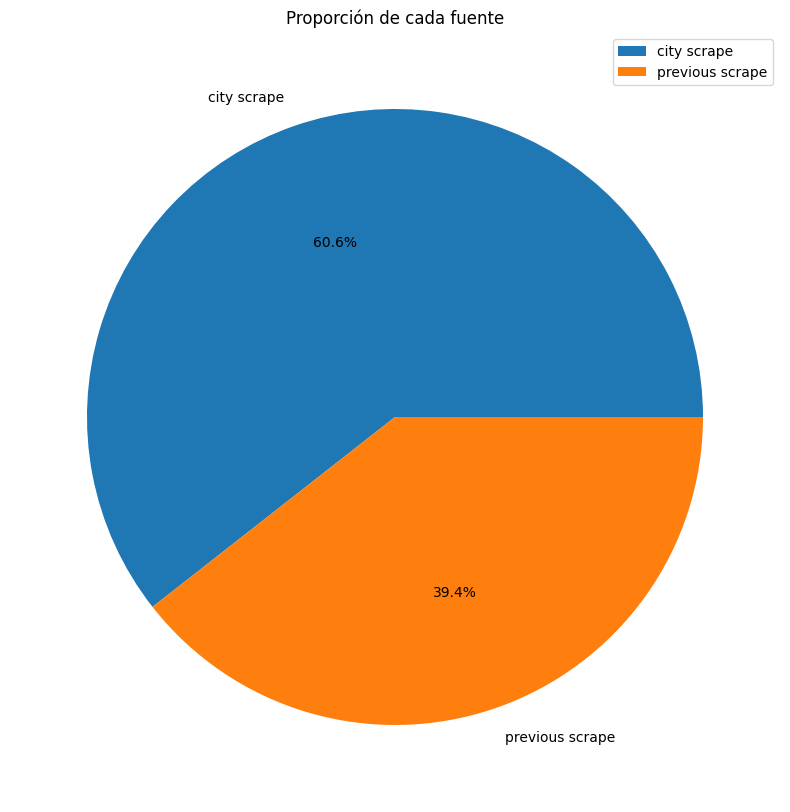

In [355]:
# Realizamos un gráfico de pastel para representar la proporción de cada fuente
source.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada fuente")
plt.ylabel("")

In [356]:
# Haremos el análisis univariado de la variable "host_response_time"
host_response_time = fp.freq_tbl(df["host_response_time"])
host_response_time.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_response_time

,host_response_time,frequency
0,No data,15001
1,within an hour,13650
2,within a few hours,5053
3,within a day,2517
4,a few days or more,1327


In [357]:
# Ajustamos el índice
host_response_time = host_response_time.set_index("host_response_time")
# Quitaremo el no data ya que no aporta información
host_response_time = host_response_time.drop("No data")
host_response_time

,frequency
host_response_time,
within an hour,13650
within a few hours,5053
within a day,2517
a few days or more,1327


Text(0, 0.5, 'Frecuencia')

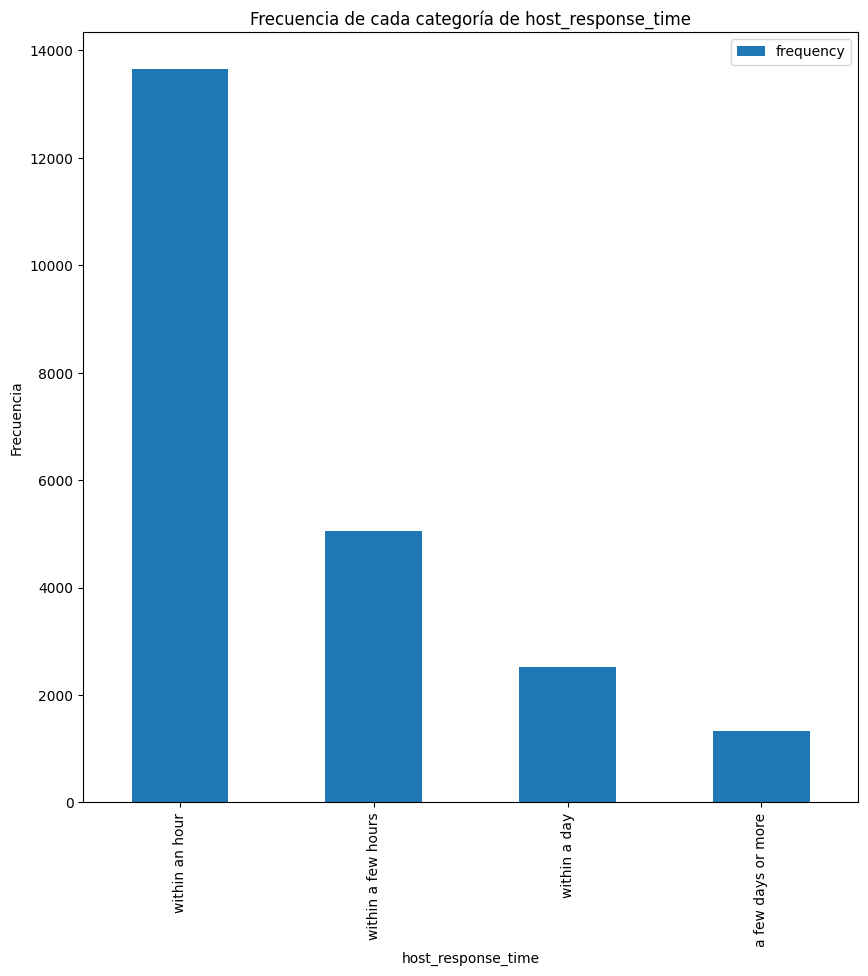

In [358]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_response_time.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_response_time")
plt.ylabel("Frecuencia")

In [359]:
# Haremos el análisis univariado de la variable "host_is_superhost"
host_is_superhost = fp.freq_tbl(df["host_is_superhost"])
host_is_superhost.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_is_superhost

,host_is_superhost,frequency
0,f,30860
1,t,6688


In [360]:
# Ajustamos el índice
host_is_superhost = host_is_superhost.set_index("host_is_superhost")
host_is_superhost

,frequency
host_is_superhost,
f,30860
t,6688


Text(0, 0.5, '')

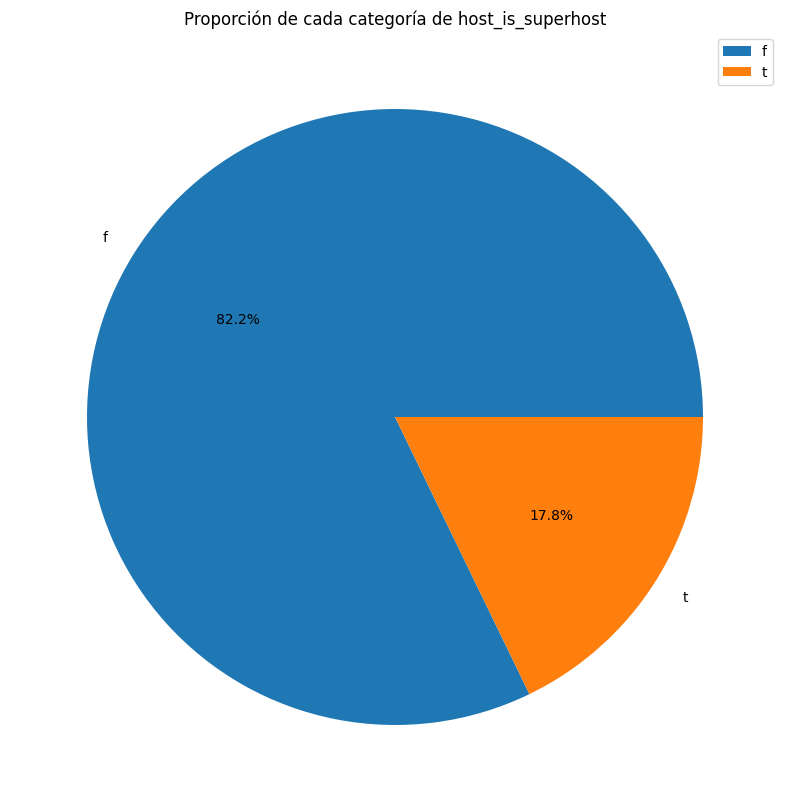

In [361]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_is_superhost.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_is_superhost")
plt.ylabel("")

In [362]:
# Haremos el análisis univariado de la variable "host_identity_verified"
host_identity_verified = fp.freq_tbl(df["host_identity_verified"])
host_identity_verified.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_identity_verified

,host_identity_verified,frequency
0,t,33172
1,f,4376


In [363]:
# Ajustamos el índice
host_identity_verified = host_identity_verified.set_index("host_identity_verified")
host_identity_verified

,frequency
host_identity_verified,
t,33172
f,4376


Text(0, 0.5, '')

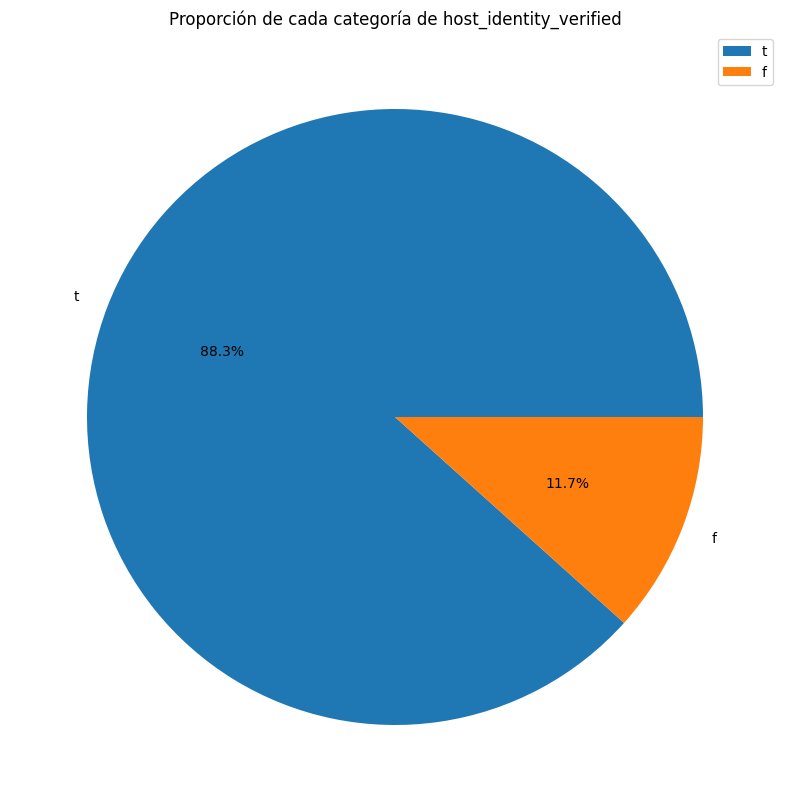

In [364]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
host_identity_verified.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de host_identity_verified")
plt.ylabel("")

In [365]:
# Haremos el análisis univariado de la variable "neighbourhood_cleansed"
neighbourhood_cleansed = fp.freq_tbl(df["neighbourhood_cleansed"])
neighbourhood_cleansed.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
neighbourhood_cleansed

,neighbourhood_cleansed,frequency
0,Bedford-Stuyvesant,2703
1,Williamsburg,2166
2,Midtown,2045
3,Harlem,1763
4,Bushwick,1543
...,...,...
218,Fort Wadsworth,1
219,New Dorp,1
220,"Chelsea, Staten Island",1
221,Richmondtown,1


In [366]:
# Ajustamos el índice
neighbourhood_cleansed = neighbourhood_cleansed.set_index("neighbourhood_cleansed")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
neighbourhood_cleansed = neighbourhood_cleansed.head(5)
neighbourhood_cleansed

,frequency
neighbourhood_cleansed,
Bedford-Stuyvesant,2703
Williamsburg,2166
Midtown,2045
Harlem,1763
Bushwick,1543


Text(0, 0.5, 'Frecuencia')

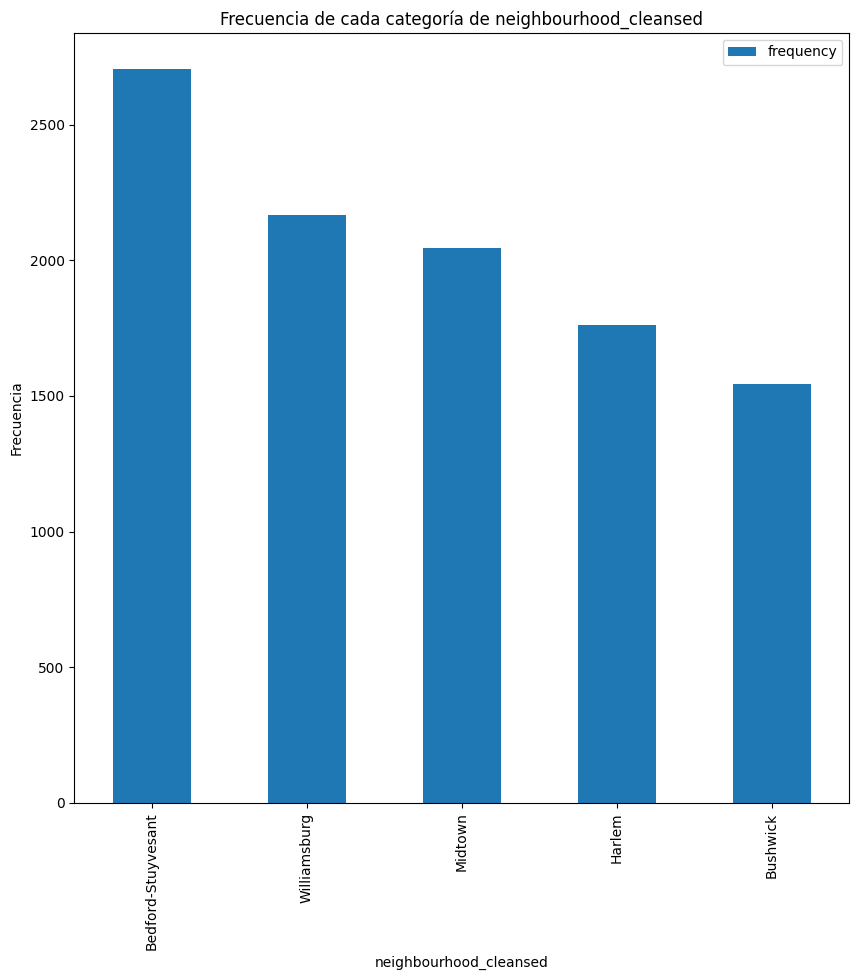

In [367]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
neighbourhood_cleansed.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de neighbourhood_cleansed")
plt.ylabel("Frecuencia")

In [368]:
# Haremos el análisis univariado de la variable "property_type"
property_type = fp.freq_tbl(df["property_type"])
property_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
property_type

,property_type,frequency
0,Entire rental unit,15666
1,Private room in rental unit,10508
2,Private room in home,2525
3,Entire home,1341
4,Room in hotel,1202
...,...,...
73,Private room in dorm,1
74,Cave,1
75,Private room in farm stay,1
76,Shared room in bed and breakfast,1


In [369]:
# Ajustamos el índice
property_type = property_type.set_index("property_type")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
property_type = property_type.head(5)
property_type

,frequency
property_type,
Entire rental unit,15666
Private room in rental unit,10508
Private room in home,2525
Entire home,1341
Room in hotel,1202


Text(0, 0.5, 'Frecuencia')

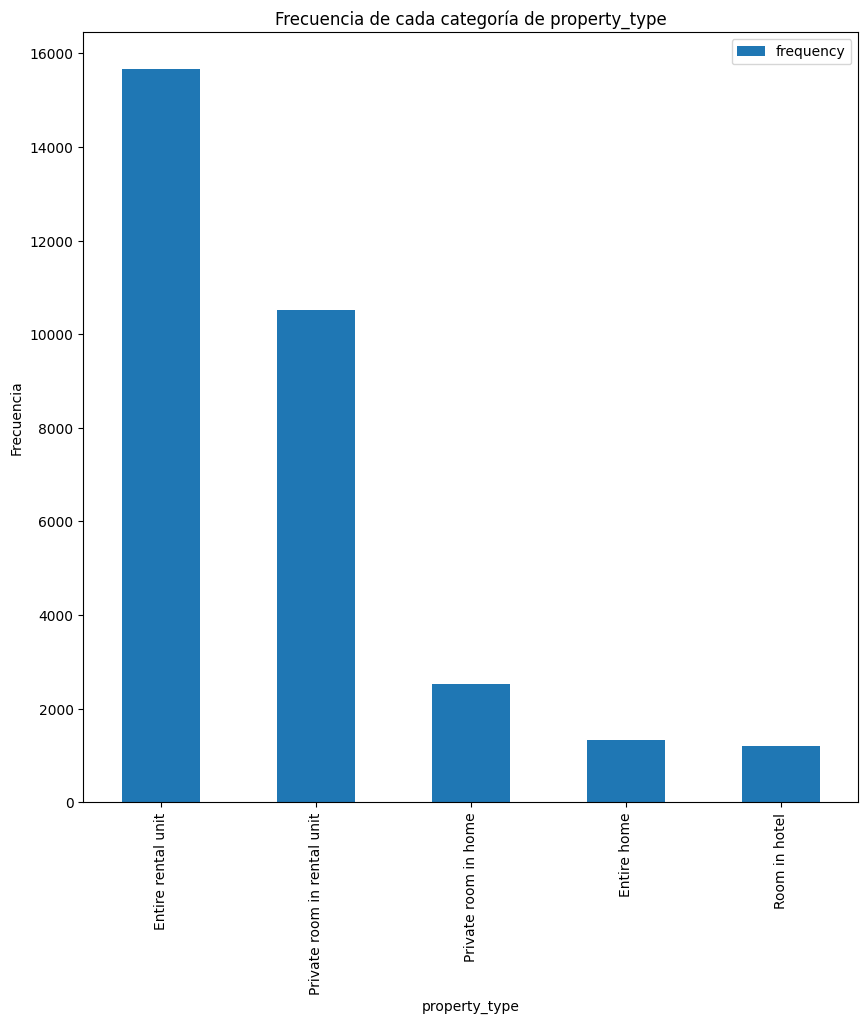

In [370]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
property_type.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de property_type")
plt.ylabel("Frecuencia")

In [371]:
# Haremos el análisis univariado de la variable "room_type"
room_type = fp.freq_tbl(df["room_type"])
room_type.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
room_type

,room_type,frequency
0,Entire home/apt,19933
1,Private room,16661
2,Hotel room,529
3,Shared room,425


Text(0, 0.5, '')

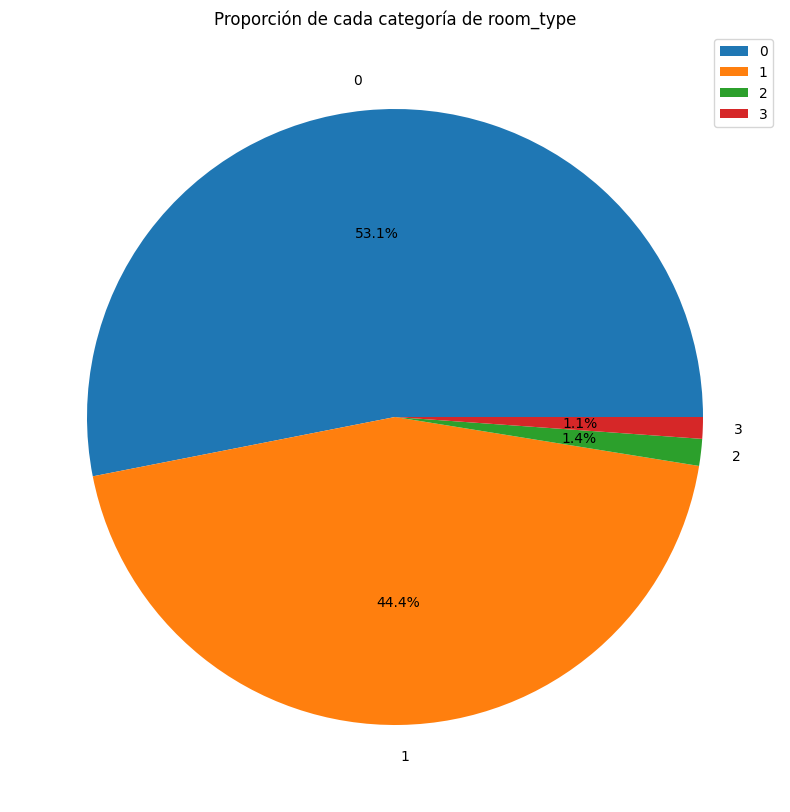

In [372]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
room_type.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de room_type")
plt.ylabel("")

In [373]:
df["bathrooms_text"].value_counts()

bathrooms_text
1 bath               19339
1 shared bath         7693
1 private bath        3199
2 baths               2775
2 shared baths        1130
1.5 baths             1050
1.5 shared baths       598
0 shared baths         412
2.5 baths              353
3 baths                332
0 baths                123
3 shared baths          96
3.5 baths               96
4 baths                 81
2.5 shared baths        57
Half-bath               52
4 shared baths          33
4.5 baths               31
Private half-bath       24
5 baths                 19
Shared half-bath        15
5 shared baths           7
6 baths                  7
3.5 shared baths         6
5.5 baths                6
7 baths                  3
7.5 baths                3
6 shared baths           2
4.5 shared baths         1
10.5 baths               1
11.5 baths               1
7.5 shared baths         1
15.5 baths               1
6.5 baths                1
Name: count, dtype: int64

In [374]:
# Haremos el análisis univariado de la variable "bathrooms_text"
bathrooms_text = fp.freq_tbl(df["bathrooms_text"])
# Eliminaremos el primer número y solo dejaremos la categoría (por ejemplo, "1.0 baths" -> "baths")
# Ignoraremos los errores por problemas de formato
bathrooms_text["bathrooms_text"] = bathrooms_text["bathrooms_text"].apply(lambda x: x.split(" ")[1] if len(x.split(" ")) > 1 else x)
bathrooms_text = fp.freq_tbl(bathrooms_text["bathrooms_text"])
bathrooms_text.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
bathrooms_text

,bathrooms_text,frequency
0,baths,17
1,shared,12
2,half-bath,2
3,bath,1
4,private,1
5,Half-bath,1


In [375]:
# Ajustamos el índice
bathrooms_text = bathrooms_text.set_index("bathrooms_text")
# Quitamos los valores de un único valor
bathrooms_text = bathrooms_text[bathrooms_text["frequency"] > 1]
bathrooms_text

,frequency
bathrooms_text,
baths,17
shared,12
half-bath,2


Text(0, 0.5, '')

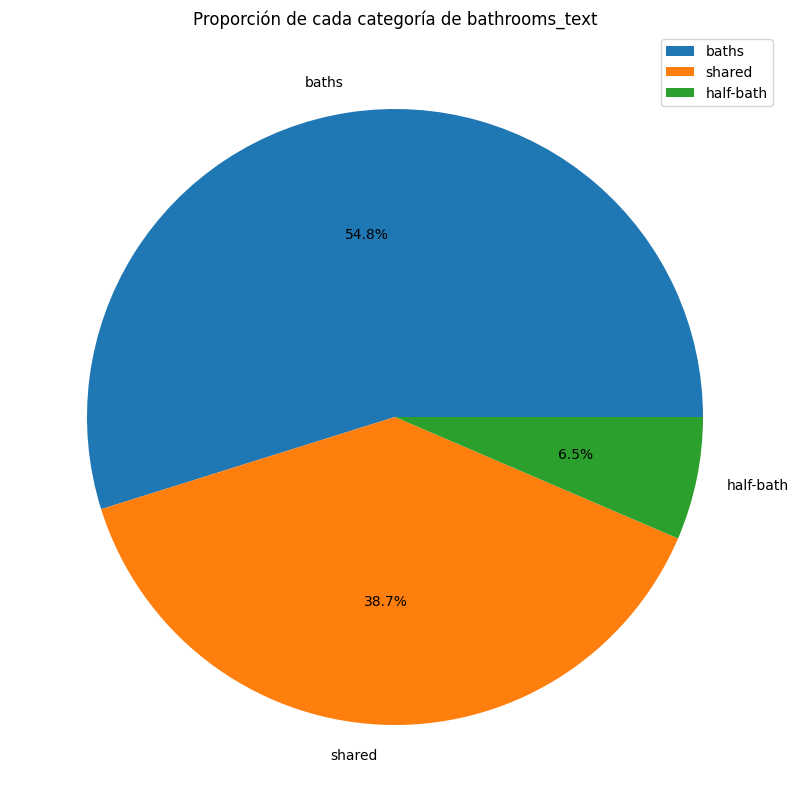

In [376]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
bathrooms_text.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de bathrooms_text")
plt.ylabel("")

In [377]:
# Haremos el análisis univariado de la variable "has_availability"
has_availability = fp.freq_tbl(df["has_availability"])
has_availability.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
has_availability

,has_availability,frequency
0,t,31896
1,f,5652


In [378]:
# Ajustamos el índice
has_availability = has_availability.set_index("has_availability")
has_availability

,frequency
has_availability,
t,31896
f,5652


Text(0, 0.5, '')

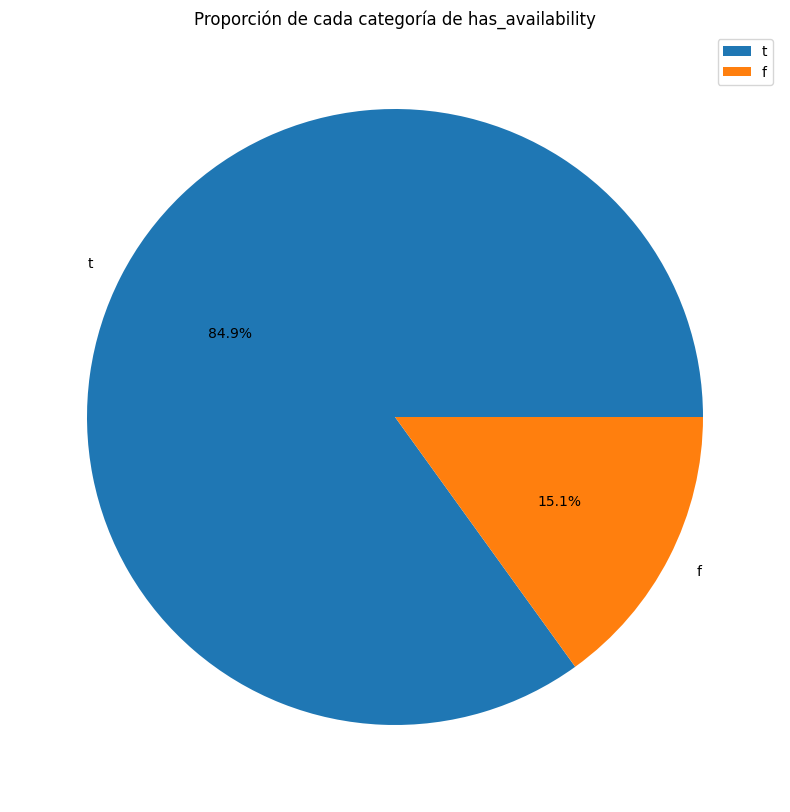

In [379]:
# Hacemos un gráfico de pastel para representar la proporción de cada categoría
has_availability.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de has_availability")
plt.ylabel("")

In [380]:
# Haremos el análisis univariado de la variable "instant_bookable"
instant_bookable = fp.freq_tbl(df["instant_bookable"])
instant_bookable.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
instant_bookable

,instant_bookable,frequency
0,f,30193
1,t,7355


In [381]:
# Ajustamos el índice
instant_bookable = instant_bookable.set_index("instant_bookable")
instant_bookable

,frequency
instant_bookable,
f,30193
t,7355


Text(0, 0.5, '')

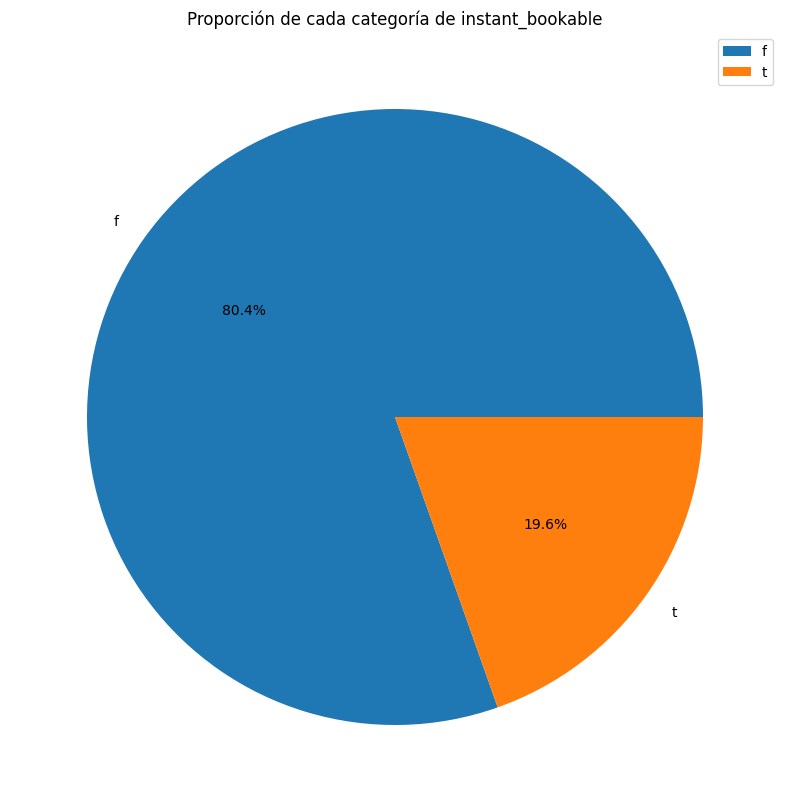

In [382]:
# Haremos un gráfico de pastel para representar la proporción de cada categoría
instant_bookable.plot(kind='pie', y='frequency', figsize=(10,10), autopct='%1.1f%%')
plt.title("Proporción de cada categoría de instant_bookable")
plt.ylabel("")

In [383]:
# Haremos el análisis univariado de la variable "host_location"
host_location = fp.freq_tbl(df["host_location"])
host_location.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_location

,host_location,frequency
0,"New York, NY",22276
1,No host_location,7999
2,"New York, United States",3117
3,United States,349
4,"Dubai, United Arab Emirates",337
...,...,...
974,"Plano, TX",1
975,"Wollongong, Australia",1
976,"Manhattan Beach, CA",1
977,"Sofia, Bulgaria",1


In [384]:
# Ajustamos el índice
host_location = host_location.set_index("host_location")
# Debido a la gran cantidad de categorías, solo mostraremos las 5 primeras
host_location = host_location.head(5)
host_location

,frequency
host_location,
"New York, NY",22276
No host_location,7999
"New York, United States",3117
United States,349
"Dubai, United Arab Emirates",337


Text(0, 0.5, 'Frecuencia')

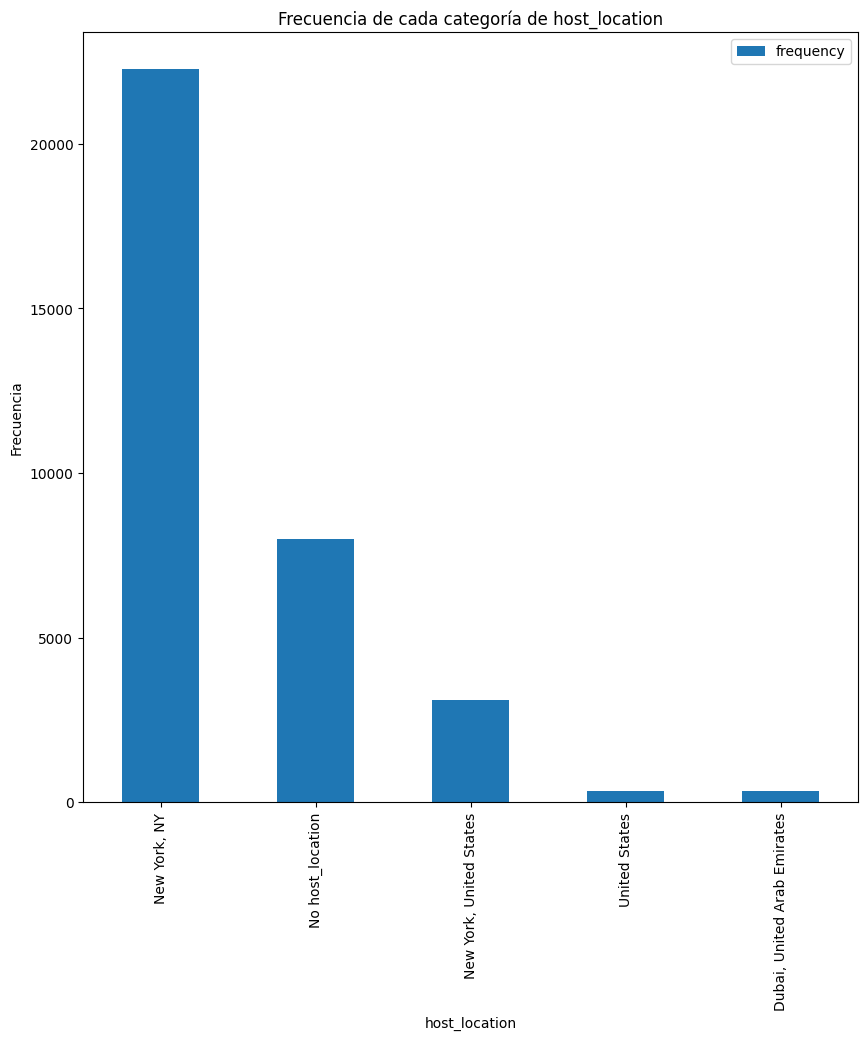

In [385]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_location.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_location")
plt.ylabel("Frecuencia")

In [386]:
# Haremos un análisis univariado de la variable "host_verifications"
host_verifications = fp.freq_tbl(df["host_verifications"])
host_verifications.drop(["percentage", "cumulative_perc"], axis=1, inplace=True)
host_verifications

,host_verifications,frequency
0,"['email', 'phone']",29329
1,"['email', 'phone', 'work_email']",4715
2,['phone'],3289
3,"['phone', 'work_email']",104
4,['email'],69
5,[],32
6,"['email', 'work_email']",10


In [387]:
# Ajustamos el índice
host_verifications = host_verifications.set_index("host_verifications")
host_verifications

,frequency
host_verifications,
"['email', 'phone']",29329
"['email', 'phone', 'work_email']",4715
['phone'],3289
"['phone', 'work_email']",104
['email'],69
[],32
"['email', 'work_email']",10


Text(0, 0.5, 'Frecuencia')

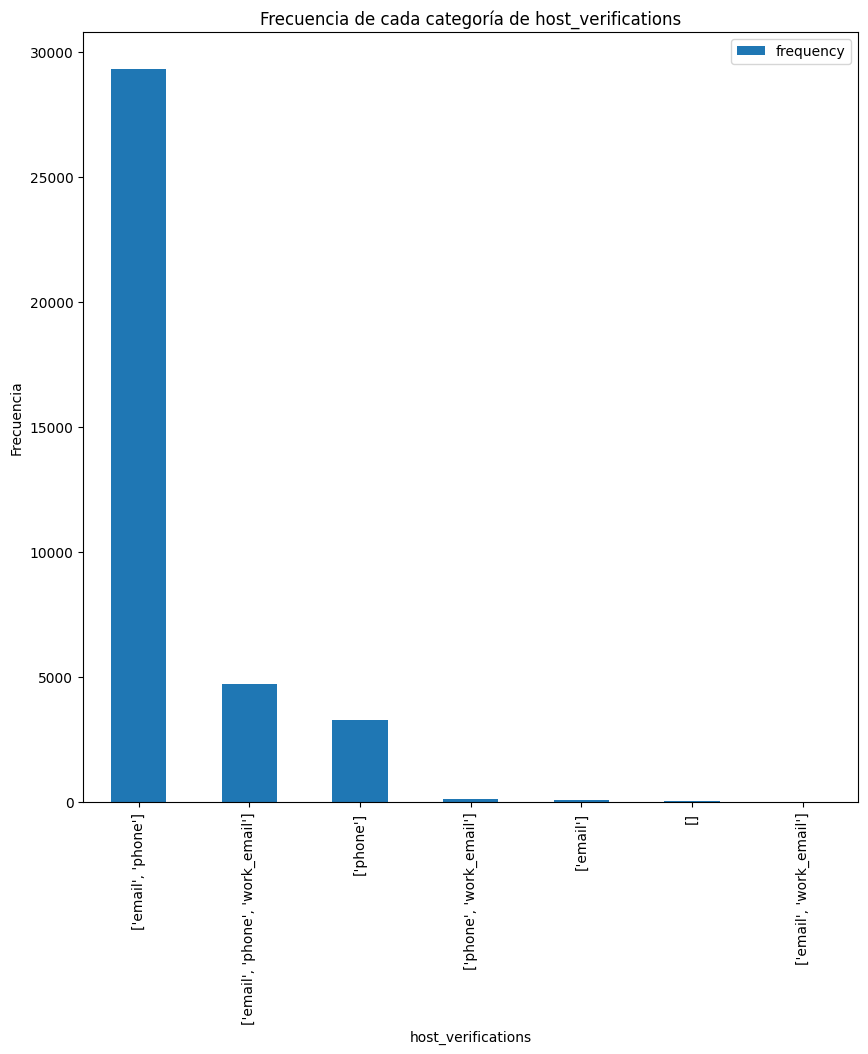

In [389]:
# Haremos un gráfico de barras para representar la frecuencia de cada categoría
host_verifications.plot(kind='bar', y='frequency', figsize=(10,10))
plt.title("Frecuencia de cada categoría de host_verifications")
plt.ylabel("Frecuencia")